In [25]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# defining interval step size (N), Range of variables (M) and getting values of x vector
N = 15 
M = 2*N + 1
x = np.linspace(-1, 1, M)

#defining function which is based on L2 Norm (Squared Errors)
def solve(n, l):
  a = cp.Variable([n,1]) # optimization variable
  xi = [] # initializing matrix whose each row contains the lower powers (<n) of x

  for i in range(n):
    xi.append(x**i)
  
  xi = np.array(xi) # conversion into numpy array 
  fx = np.power(x, n).reshape(1, M) # reshaping from normal array to matrix computable array

  if (l == 1):
    cost_fn = cp.sum(cp.abs(fx - a.T@xi)) # sum errors
  elif (l == 2):
    cost_fn = cp.sum_squares(fx - a.T@xi) # squared errors

  problem = cp.Problem(cp.Minimize(cost_fn)) #problem formulation
  problem.solve()
  
  return [a, fx, xi, cost_fn.value] # returning 1. coeff vector, 2. polynomial function of degree n, 3. matrix containing lower powers of x, 4. optimal cost

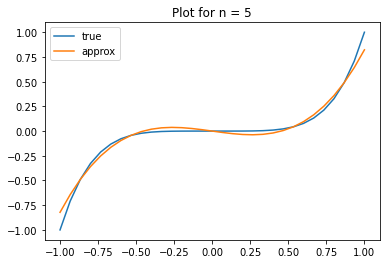

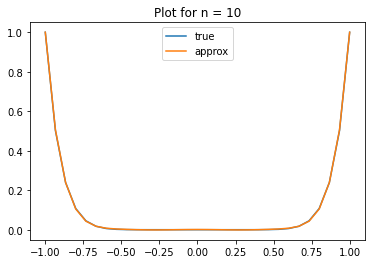

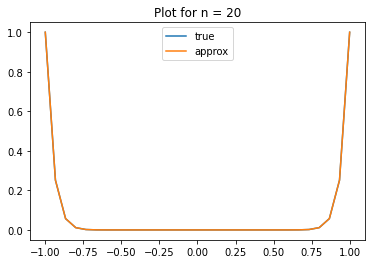

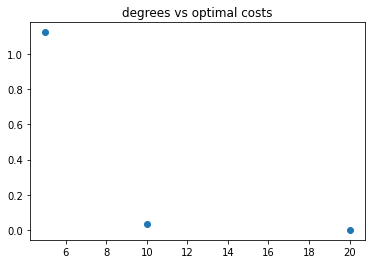

In [26]:
n_arr = [5, 10, 20] # different degrees
cost_arr = [] # array to store cost for each degree

# plots with l2 norm as cost functions
for n in n_arr:
  a, fx, xi, optCost = solve(n, 2)
  cost_arr.append(optCost)
  plt.figure()
  plt.plot(x, fx.T, label='true')
  plt.plot(x, (a.value.T@xi).T, label='approx')
  plt.legend()
  plt.title("Plot for n = {}".format(n))

cost_arr = np.array(cost_arr)

# plot of degrees vs optimal costs
plt.figure()
plt.scatter(n_arr, cost_arr)
plt.title("degrees vs optimal costs")
plt.show()

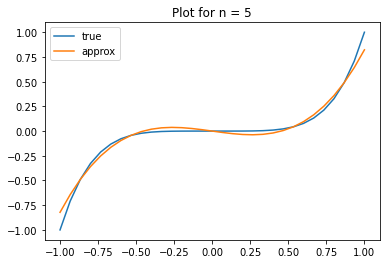

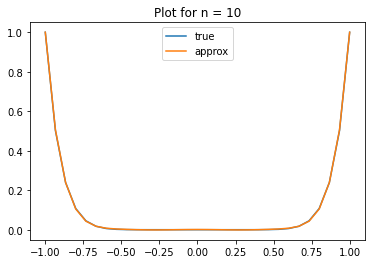

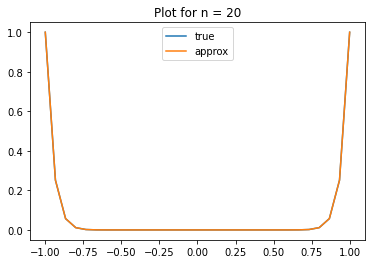

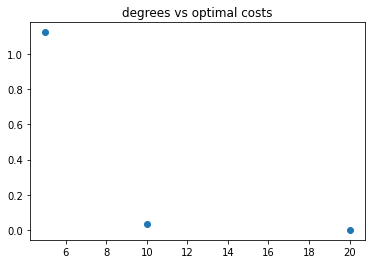

In [27]:
cost_arr = [] # array to store cost for each degree

# plots with l1 norm as cost functions
for n in n_arr:
  a, fx, xi, optCost = solve(n, 1)
  cost_arr.append(optCost)
  plt.figure()
  plt.plot(x, fx.T, label='true')
  plt.plot(x, (a.value.T@xi).T, label='approx')
  plt.legend()
  plt.title("Plot for n = {}".format(n))

cost_arr = np.array(cost_arr)

# plot of degrees vs optimal costs
plt.figure()
plt.scatter(n_arr, cost_arr)
plt.title("degrees vs optimal costs")
plt.show()